<a href="https://colab.research.google.com/github/Maleniski/ing-caracteristicas/blob/main/Proyecto2_MaElenaMtzMzn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2 (parte 1): Haciendo un tablero que cuente una historia.

**Alumno:** María Elena Martínez Manzanares

**Profesor:** Doctor Julio Waissman Vilanova

**Curso:** Ingeniería de Características

**Programa educativo:** Maestría en Ciencia de Datos de la Universidad de Sonora

Hermosillo, Sonora a 2 de noviembre del 2022

<h2 aling = center > Instrucciones </h2>

***
Para esta parte del proyecto se solicita que en el repositorio del proyecto se tenga lo siguiente:

* Un archivo en html o en pdf con el EDA automático utilizando alguna herramienta.
* Una libreta jupyter, o un Rmarkdown, en donde se realice un EDA más orientado a la relación de las variables, recuerda que no tiene que ser muy pulcro, solamente que permita la comunicación técnica entre colegas.
* Un archivo en markdown, en el cual se especifique:

  1. La historia que queremos contar con nuestros datos.
  2. Los KPI y otros indicadores que son útiles para contar la historia (al menos uno). 
  3. Al menos de un KPI, desarrollar la metodología tal como se muestra en alguno de los formatos facilitados.

* Un borrador (puede ser una foto tomada de un cuaderno) de como pensamos hacer el tablero de visualización.

***

<h2 aling = center > Solución </h2>

Es posible encontrar una descripción de los datos en [esta](https://github.com/Maleniski/ing-caracteristicas/blob/main/FuentesDatosMigrantes/readme.md) liga y los EDAs automáticos en [esta](https://github.com/Maleniski/ing-caracteristicas/tree/main/EDA_automatico_datosmigrantes) carpeta de GitHub.

Se presentarán en este cuaderno:
* El objeto de nuestro análisis;
* EDA que posiblemente nos pueda ayudar a resolver la pregunta de nuestro interés;
* KPI diseñado con la [metodología](https://bernardmarr.com/img/KPI%20Indicators%20Template.pdf) vista en clase;
* Imagen que presenta el borrado del tablero que se pretende construir.


**Pregunta que deseamos resolver:**

<font size="5"> Basados en históricos, ¿qué es lo que le ocurre a un inmigrante ilegal que no logra cruzar la frontera Sonora-Arizona? </font>

Necesitamos gráficas que nos permitan responder las siguientes preguntas, ya que son las que conduciran lo que en realidad queremos responder: nuestra pregunta de investigación. 

<img title="Preguntas que estamos interesados en responder" alt="Alt text" src="https://github.com/Maleniski/ing-caracteristicas/raw/main/DiagramasDeBorradorTableroMigrantes/DiagramaPreguntasPorResponder_DatosFrontera.png" width="700">

Se requiere estudiar si podemos realizar las siguientes gráficas.

* Descripción general:
  * Una agregación de datos para el número de personas localizadas (sin importar si estan vivas o muertas).
  * Una gráfica de barras de personas vivas y muertas, separados por sexo.
* De los muertos:
  * Una gráfica de barras de si fueron identificados.
  * Un histograma con las edades.
  * Una gráfica de barra de motivos de muerte.
  * Una gráfica de barra de tiempo de localización.
  * Histograma de año con más muertes.
  * Histograma de mes con más muertes.

* De los vivos:
  * Histograma de la edad.
  * Gráfica de barras de sexo.
  * Gráfica de barras de nivel educativo.
  * Gráfica de barras de personas que duraron menos de 30 días que informe que dependencias las capturaron.
  * Servicios que más frecuentemente recibieron los capturados.




Bajamos las librerias necesarias.

In [88]:
import pandas as pd
import numpy as np
import datetime
import urllib.request
import os
from zipfile import ZipFile
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [38]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
import wget

Descarga de datos.

In [40]:
ARIZONA = pd.read_csv("https://raw.githubusercontent.com/Maleniski/ing-caracteristicas/main/FuentesDatosMigrantes/ARIZONA.csv", index_col=0)
CONAPO = pd.read_csv("https://raw.githubusercontent.com/Maleniski/ing-caracteristicas/main/FuentesDatosMigrantes/CONAPO.csv", index_col=0)
PMD = pd.read_csv("https://raw.githubusercontent.com/Maleniski/ing-caracteristicas/main/FuentesDatosMigrantes/PMD.csv", index_col=0)

wget.download("https://github.com/Maleniski/ing-caracteristicas/raw/main/FuentesDatosMigrantes/SEGOB.zip")

with ZipFile("SEGOB.zip") as myzip:
    SEGOB = myzip.open("SEGOB_V2.csv")

SEGOB = pd.read_csv(SEGOB, index_col=0)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,66,67,68,69,70,71) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


##  Descripción general.

### Una agregación de datos para el número de personas localizadas (sin importar si estan vivas o muertas).

In [41]:
ARIZONA['Reporting Date'] = ARIZONA['Reporting Date'].astype('datetime64[ns]') #casteamos la columna a datetime

ARIZONA.head(3)

,Name,Sex,Age,Reporting Date,Cause of Death,OME Determined COD,Body Condition,Post Mortem Interval,County
0,Unidentified,male,NaN,2000-01-10,Skeletal Remains,UNDETERMINED - MUMMIFIED AND SKELETAL REMAINS,Skeletonization w/ mummification,< 5 weeks,YUMA
1,"Nicolas, Tomas",male,17.0,2000-01-22,Exposure,HYPOTHERMIA,Fully fleshed,< 1 day,PIMA
2,Unidentified,male,NaN,2000-01-20,Skeletal Remains,UNDETERMINED - SKELETAL REMAINS,Complete skeletonization w/ bone degradation,> 6-8 months,SANTA CRUZ


In [42]:
PMD.head(2)

,Incident_Date,Year,Reported_Month,Number_Dead,Total_Number_of_Dead_and_Missing,Number_of_Survivors,Number_of_Females,Number_of_Males,Number_of_Children,Cause_of_Death,Location_of_Death
0,2014-01-06 12:00:00,2014,January,1,1,NaN,NaN,1.0,NaN,Mixed or unknown,Pima Country Office of the Medical Examiner ju...
1,2014-01-12 12:00:00,2014,January,1,1,NaN,NaN,NaN,NaN,Mixed or unknown,Pima Country Office of the Medical Examiner ju...


In [43]:
SEGOB = SEGOB[SEGOB["EDO_DET_parsed"]=="Arizona"]
SEGOB['FEC_REP'] = SEGOB['FEC_REP'].astype('datetime64[ns]')
SEGOB.head(2)

,DEL,FEC_REP,CLASIF_REP,IRE,SEXO,EDA,EN_NAC,NIV_ESC,ACOM_REP,PERM_EU,...,APO_VES_parsed,APO_ACT_NAC_parsed,APO_TRASF_parsed,APO_CURP_parsed,APO_ASF_parsed,APO_AME_parsed,APO_REC_PERT_parsed,APO_AT_MEDICA_parsed,MUN_NAC_parsed,MUN_DES_parsed
0,26,2016-06-06,1,16000001,1,100,14,7,3,1,...,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Puerto Vallarta, Jal."
1,26,2016-01-22,1,16000002,1,99,21,5,3,1,...,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Puebla, Pue."


Las fechas de la tabla SEGOB van del 2016-01-01 al 2021-12-31.

En la tabla SEGOB hay una columna llamada PERM_EU_parsed que nos permite conocer las personas que duraron de 0 a 30 días, que supondremos que son personas que no lograron cruzar a la frontera.

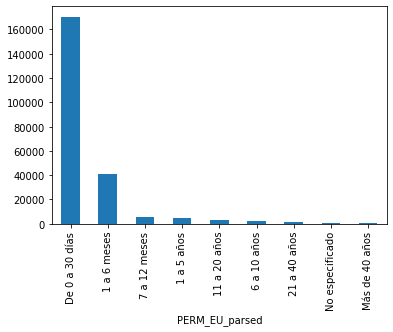

In [44]:
SEGOB.groupby("PERM_EU_parsed").count()["DEL"].sort_values(ascending=False).plot.bar()

De hecho, las personas de 0 a 30 días son la mayoría.

In [45]:
loc_vivas=SEGOB.groupby("PERM_EU_parsed").count()["DEL"].loc["De 0 a 30 días"]
print("El número de personas localizadas vivas al intentar cruzar la frontera es de "+str(loc_vivas)+".")

El número de personas localizadas vivas al intentar cruzar la frontera es de 170615.


En la tabla ARIZONA podemos contar cuantas personas fueron las localizadas muertas al intentar cruzar la frontera. Hay que tener en consideración que la tabla ARIZONA tiene un registro mucho más amplio a partir del año 2000. Hay que restringir los datos para que las comparaciones sean justas a las fechas 2016-01-01 al 2021-12-31.

In [109]:
loc_muertas=ARIZONA[(ARIZONA["Reporting Date"]>="2016-01-01") & (ARIZONA["Reporting Date"]>"2021-12-31")].shape[0]
print("El número de personas localizadas muertas al intentar cruzar la frontera es de "+str(loc_muertas)+".")

El número de personas localizadas muertas al intentar cruzar la frontera es de 151.


In [47]:
vivos_muertos = {'loc_vivos': [loc_vivas], 'loc_muertos': [loc_muertas]}
vivos_muertos = pd.DataFrame(data=vivos_muertos)
vivos_muertos

,loc_vivos,loc_muertos
0,170615,151


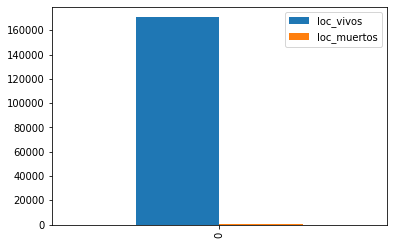

In [48]:
vivos_muertos.plot.bar()

### Una gráfica de barras de personas vivas y muertas, separados por sexo.

In [49]:
vivos_sex=(SEGOB[SEGOB["PERM_EU_parsed"]=="De 0 a 30 días"]
        .groupby("SEXO_parsed")
        .count()["DEL"])
vivos_sex

SEXO_parsed
Hombre    150995
Mujer      19620
Name: DEL, dtype: int64

In [110]:
muertos_sex=(ARIZONA[(ARIZONA["Reporting Date"]>="2016-01-01") & (ARIZONA["Reporting Date"]<="2021-12-31")]
        .groupby("Sex")
        .count()["Name"])
muertos_sex

Sex
female           86
male            865
undetermined     54
Name: Name, dtype: int64

Actualizamos la tabla vivos_muertos, para tener los datos separados por sexo.

In [51]:
vivos_muertos = ({"Sexo":["Hombres", "Mujeres"],
                  'loc_vivos': [vivos_sex.loc["Hombre"],vivos_sex.loc["Mujer"]], 
                  'loc_muertos': [muertos_sex.loc["male"], muertos_sex.loc["female"]]})
vivos_muertos = pd.DataFrame(data=vivos_muertos)
vivos_muertos

,Sexo,loc_vivos,loc_muertos
0,Hombres,150995,865
1,Mujeres,19620,86


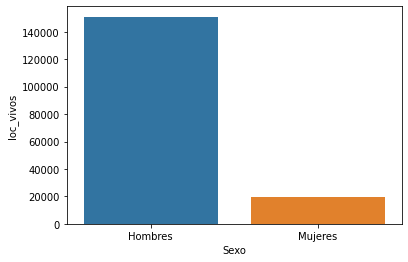

In [52]:
sns.barplot(data=vivos_muertos, x="Sexo", y="loc_vivos")

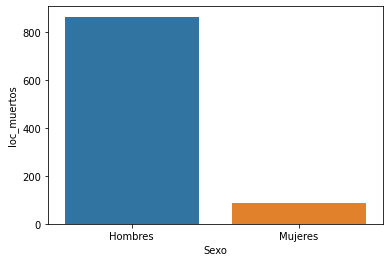

In [53]:
sns.barplot(data=vivos_muertos, x="Sexo", y="loc_muertos")

## De los muertos.

### Una gráfica de barras de si fueron identificados.

In [111]:
Arizona_16_21=ARIZONA[(ARIZONA["Reporting Date"]>="2016-01-01") & (ARIZONA["Reporting Date"]<="2021-12-31")]

In [112]:
sin_identificar=Arizona_16_21[Arizona_16_21["Name"]=="Unidentified"].shape[0]
print("El número de personas localizadas muertas al intentar cruzar la frontera que no fueron identificadas es de "+str(sin_identificar)+".")

El número de personas localizadas muertas al intentar cruzar la frontera que no fueron identificadas es de 504.


In [56]:
identificadas = Arizona_16_21.shape[0]-sin_identificar
print("El número de personas localizadas muertas al intentar cruzar la frontera que fueron identificadas es de "+str(identificadas)+".")

El número de personas localizadas muertas al intentar cruzar la frontera que fueron identificadas es de 504.


In [57]:
identificados_muertos = {'cantidad': [identificadas,sin_identificar]}
identificados_muertos = pd.DataFrame(data=identificados_muertos, index=["identificadas","sin identificar"])
identificados_muertos

,cantidad
identificadas,504
sin identificar,504


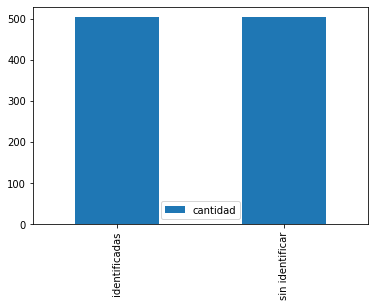

In [58]:
identificados_muertos.plot.bar()

### Un histograma con las edades.

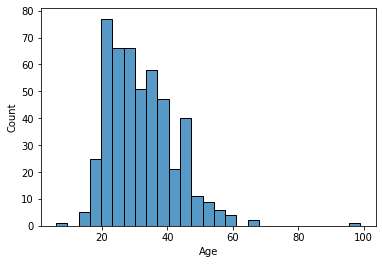

In [59]:
sns.histplot(data=Arizona_16_21, x="Age")

### Una gráfica de barra de motivos de muerte.

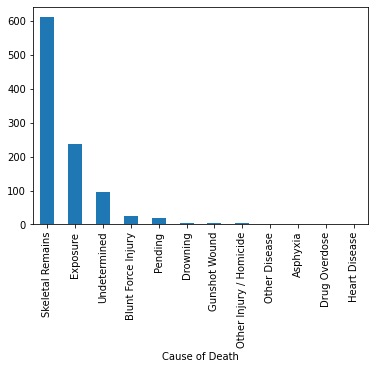

In [60]:
Arizona_16_21.groupby(["Cause of Death"]).count()["Name"].sort_values(ascending=False).plot.bar()

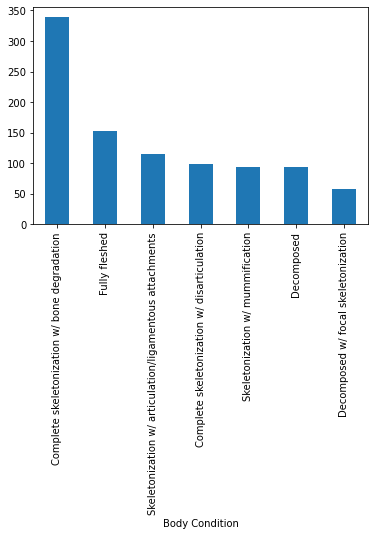

In [61]:
Arizona_16_21.groupby(["Body Condition"]).count()["Name"].sort_values(ascending=False).plot.bar()

### Una gráfica de barra de tiempo de localización.

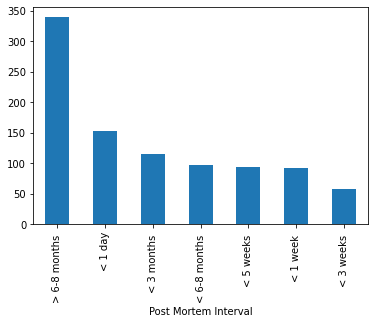

In [62]:
Arizona_16_21.groupby("Post Mortem Interval").count()["Name"].sort_values(ascending=False).plot.bar()

### Histograma de año con más muertes.

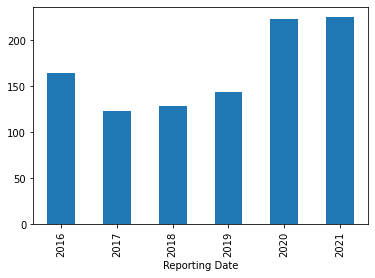

In [63]:
Arizona_16_21.groupby(Arizona_16_21["Reporting Date"].dt.year).count()["Name"].plot.bar()

### Histograma de mes con más muertes.

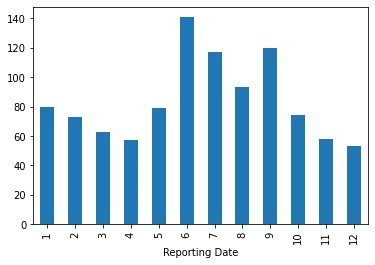

In [64]:
Arizona_16_21.groupby(Arizona_16_21["Reporting Date"].dt.month).count()["Name"].plot.bar()

## De los vivos


### Histograma de la edad.

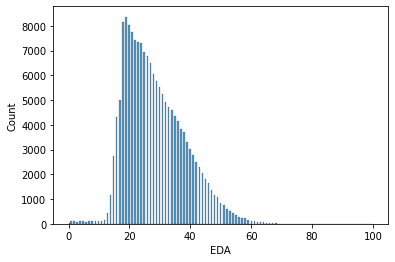

In [65]:
aux = SEGOB[SEGOB["PERM_EU_parsed"]=="De 0 a 30 días"]
sns.histplot(data=aux, x="EDA")

### Gráfica de barras de sexo.

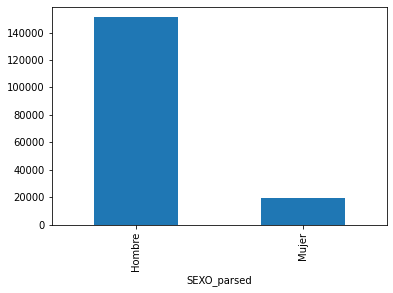

In [66]:
(SEGOB[SEGOB["PERM_EU_parsed"]=="De 0 a 30 días"]
              .groupby(["SEXO_parsed"])
              .count()["DEL"]
              .plot.bar())

### Gráfica de barras de nivel educativo.

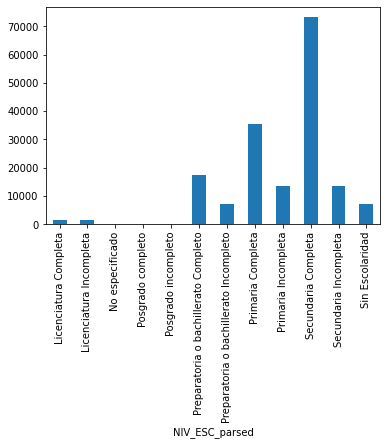

In [67]:
(SEGOB[SEGOB["PERM_EU_parsed"]=="De 0 a 30 días"]
              .groupby(["NIV_ESC_parsed"])
              .count()["DEL"]
              .plot.bar())

### Gráfica de barras de personas que duraron menos de 30 días que informe que dependencias las capturaron.

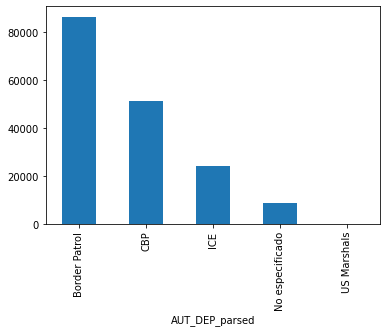

In [68]:
(SEGOB[SEGOB["PERM_EU_parsed"]=="De 0 a 30 días"]
              .groupby(["AUT_DEP_parsed"])
              .count()["DEL"]
              .plot.bar())

### Servicios que más frecuentemente recibieron los capturados.

In [69]:
import matplotlib.pyplot as plt

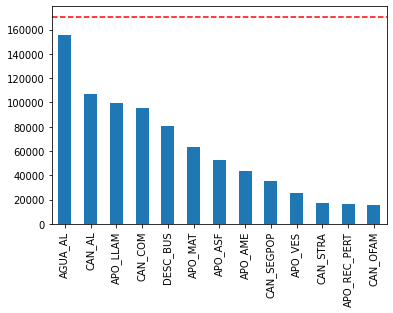

In [70]:
(SEGOB[SEGOB["PERM_EU_parsed"]=="De 0 a 30 días"][["CAN_AL","CAN_COM","CAN_STRA",
                                                   "CAN_SEGPOP","CAN_OFAM","AGUA_AL",
                                                   "DESC_BUS","APO_LLAM","APO_MAT",
                                                   "APO_VES","APO_ASF","APO_AME",
                                                   "APO_REC_PERT"]].sum()
                                                   .sort_values(ascending=False)
                                                   .plot.bar())

plt.axhline(y=SEGOB[SEGOB["PERM_EU_parsed"]=="De 0 a 30 días"].shape[0], color='r', linestyle='--')
plt.show()

## Diseño de KPI

Se propone un KPI que permita identificar a lo largo de los meses la cantidad de migrantes localizados vivos y localizados muertos, con el objetivo de detectar si la cantidad de localizados muertos es mayor o igual a los localizados vivos. 

El análisis del KPI puede ser encontrado en la [siguiente liga](https://docs.google.com/document/d/1cMpoQe4566KmQ2mwEoSveCdY1LL6IVRx-6XbkzKTuFI/edit?usp=sharing).

Agrupamos los datos de los localizados vivos y muertos por año y mes.

In [82]:
#Vivos
vivos = (SEGOB[SEGOB["PERM_EU_parsed"]=="De 0 a 30 días"]
                      .set_index('FEC_REP')
                      .groupby(pd.Grouper(freq='M'))
                      .count()["DEL"])
vivos

FEC_REP
2016-01-31    2572
2016-02-29    3423
2016-03-31    4655
2016-04-30    4502
2016-05-31    4791
              ... 
2021-08-31    2215
2021-09-30    3041
2021-10-31    3406
2021-11-30    3806
2021-12-31    2920
Freq: M, Name: DEL, Length: 72, dtype: int64

In [83]:
#Muertos
muertos = (Arizona_16_21.set_index('Reporting Date')
              .groupby(pd.Grouper(freq='M'))
              .count()["Name"])
muertos

Reporting Date
2016-01-31     8
2016-02-29     1
2016-03-31     8
2016-04-30     8
2016-05-31     9
              ..
2021-08-31    16
2021-09-30    26
2021-10-31    12
2021-11-30    15
2021-12-31     5
Freq: M, Name: Name, Length: 72, dtype: int64

In [94]:
localizados_ts=(pd.concat([vivos,muertos], axis=1)
                  .reset_index()
                  .rename(columns={"index":"Fecha", "DEL": "loc_vivos", "Name": "loc_muertos"}))
localizados_ts

,Fecha,loc_vivos,loc_muertos
0,2016-01-31,2572,8
1,2016-02-29,3423,1
2,2016-03-31,4655,8
3,2016-04-30,4502,8
4,2016-05-31,4791,9
...,...,...,...
67,2021-08-31,2215,16
68,2021-09-30,3041,26
69,2021-10-31,3406,12
70,2021-11-30,3806,15


In [107]:
fig = px.line(localizados_ts, x="Fecha", y=localizados_ts.columns,
              labels={
                     "loc_vivos": "Localizados vivos",
                     "loc_muertos": "Localizados muertos",
                      "value":"Cantidad"},
              hover_data={"Fecha": "|%B, %Y"},
              title='Inmigrantes localizados vivos vs localizados muertos por mes'
              )
fig.update_layout(legend_title="Variable")
fig.show()

## Diseño del tablero

Se presenta a continuación el diseño del tablero elaborado en [draw.io](https://app.diagrams.net/).

El tablero consistirá de tres secciones, en una sola página larga dividida o tres páginas diferentes, en donde se tenga la siguiente información.


* Overview:
  * KPI
  * Numeralia de totales para el número de total personas localizadas, total muertas, total vivas.
  * Una gráfica de barras de personas vivas y muertas, separados por sexo.

* De los muertos:
  * Una gráfica de barras de si fueron identificados.
  * Un histograma con las edades.
  * Una gráfica de barra de motivos de muerte.
  * Una gráfica de barra de tiempo de localización.
  * Histograma de año con más muertes.
  * Histograma de mes con más muertes.

* De los vivos:
  * Histograma de la edad.
  * Gráfica de barras de sexo.
  * Gráfica de barras de nivel educativo.
  * Gráfica de barras de personas que duraron menos de 30 días que informe que dependencias las capturaron.
  * Servicios que más frecuentemente recibieron los capturados.


### Página 1

<img title="Página 1" alt="Alt text" src="https://github.com/Maleniski/ing-caracteristicas/raw/main/DiagramasDeBorradorTableroMigrantes/BorradorTableroInmigrantes-Pagina1.png" width="700">

### Página 2

<img title="Página 2" alt="Alt text" src="https://github.com/Maleniski/ing-caracteristicas/raw/main/DiagramasDeBorradorTableroMigrantes/BorradorTableroInmigrantes-Pagina2.png" width="700">

### Página 3

<img title="Página 2" alt="Alt text" src="https://github.com/Maleniski/ing-caracteristicas/raw/main/DiagramasDeBorradorTableroMigrantes/BorradorTableroInmigrantes-Pagina3.png" width="700">